In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
prefix="final_data"
suffix="unsup_5"

x = np.load(f"{prefix}/x_data_1024_{suffix}.npy")
y= np.load(f"{prefix}/y_data_1024_{suffix}.npy")



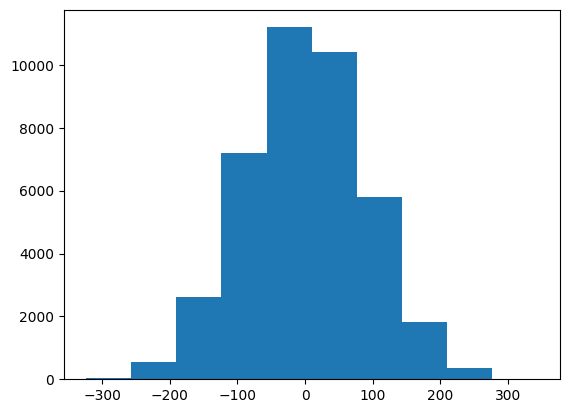

In [18]:
plt.hist(y[:,1,:,:].flatten())
plt.show()

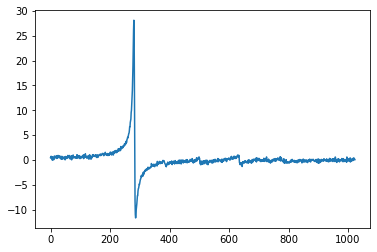

In [3]:
sample=20
transient=0

plt.plot(np.arange(1024),np.real(x[sample,:,0,transient]))
plt.show()

In [4]:
prefix="noisy_datasets"
suffix="unsup_10"

fids_off = np.load(f"{prefix}/off_fids_{suffix}.npy")
fids_on = np.load(f"{prefix}/on_fids_{suffix}.npy")
x = np.load(f"{prefix}/x_data_{suffix}.npy")
y_freq = np.load(f"{prefix}/y_dataFreq_{suffix}.npy")
y_phase = np.load(f"{prefix}/y_dataPhase_{suffix}.npy")

-3.389878843066891
13.222436495867061


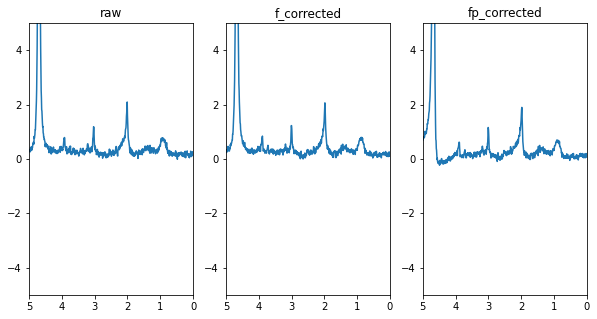

In [5]:
sample = 5
transient = 0

i_x = x[sample,:,0,transient]
i_freq = y_freq[sample,0,0,transient]
i_phase = y_phase[sample,0,0,transient]

ppm = np.flip(np.arange(-4.82513030313706,10.8251303031371,(10.8251303031371+4.82513030313706)/2048))
t = np.arange(0,0.0005*2048,0.0005)

i_fid_raw = fids_off[sample,:,transient]

i_fid_fc = i_fid_raw*np.exp(1j*t*i_freq*2*math.pi)
i_fid_fpc = i_fid_fc*np.exp(1j*i_phase*math.pi/180)

i_fc_spec = np.fft.fftshift(np.fft.ifft(i_fid_fc,axis=0),axes=0)
i_fpc_spec = np.fft.fftshift(np.fft.ifft(i_fid_fpc))

fig,ax = plt.subplots(1,3,figsize=(10,5))

ax[0].plot(ppm,np.real(i_x),label='x',alpha=1)
ax[1].plot(ppm,np.real(i_fc_spec),label='f_c',alpha=1)
ax[2].plot(ppm,np.real(i_fpc_spec),label='fp_c',alpha=1)

titles=["raw","f_corrected","fp_corrected"]
print(i_freq)
print(i_phase)
for i in range(0,3):
    ax[i].set_title(titles[i])
    ax[i].set_xlim(0,5)
    ax[i].set_ylim(-5,5)
    ax[i].invert_xaxis()

#plt.legend()
plt.show()

